1. 탐색적 데이터분석 및 시각화
2. Train Test Split 7:3
3. Logistic Regression 수행
4. y: customerType(Online, Offline)
5. Metric: Accuracy, f1 Score

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

## 1.탐색적 데이터분석 및 시각화

In [64]:
df_pd = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/product.csv')

In [5]:
df_pd.info()

# y를 제외하고는 모두 숫자형 (encoding 필요없음)
# 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15009 entries, 0 to 15008
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           15009 non-null  object 
 1   meanPriceEach  15009 non-null  float64
 2   totalOrder     15009 non-null  float64
 3   orderType_1    15009 non-null  float64
 4   orderType_2    15009 non-null  float64
 5   orderType_3    15009 non-null  float64
 6   totalBundle    15009 non-null  float64
 7   bundleType_1   15009 non-null  float64
 8   bundleType_2   15009 non-null  float64
 9   customerType   15009 non-null  object 
 10  FY             15009 non-null  int64  
 11  Country        15009 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1.4+ MB


In [6]:
df_pd.head()


,Date,meanPriceEach,totalOrder,orderType_1,orderType_2,orderType_3,totalBundle,bundleType_1,bundleType_2,customerType,FY,Country
0,2015-01-04,1.56,58065.35,10049.66,25228.37,3672.89,19114.43,17280.89,1833.54,Online,2015,25
1,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,510468.50,429166.89,80986.81,Offline,2015,25
2,2015-01-11,1.17,2335986.11,560119.16,1032606.49,191515.19,551745.27,465764.93,85966.27,Offline,2015,25
3,2015-01-11,1.52,65483.08,14570.74,30445.75,3170.11,17296.48,16715.45,581.03,Online,2015,25
4,2015-01-18,1.65,52559.10,11415.28,25306.56,3345.08,12492.18,10971.43,1520.75,Online,2015,25


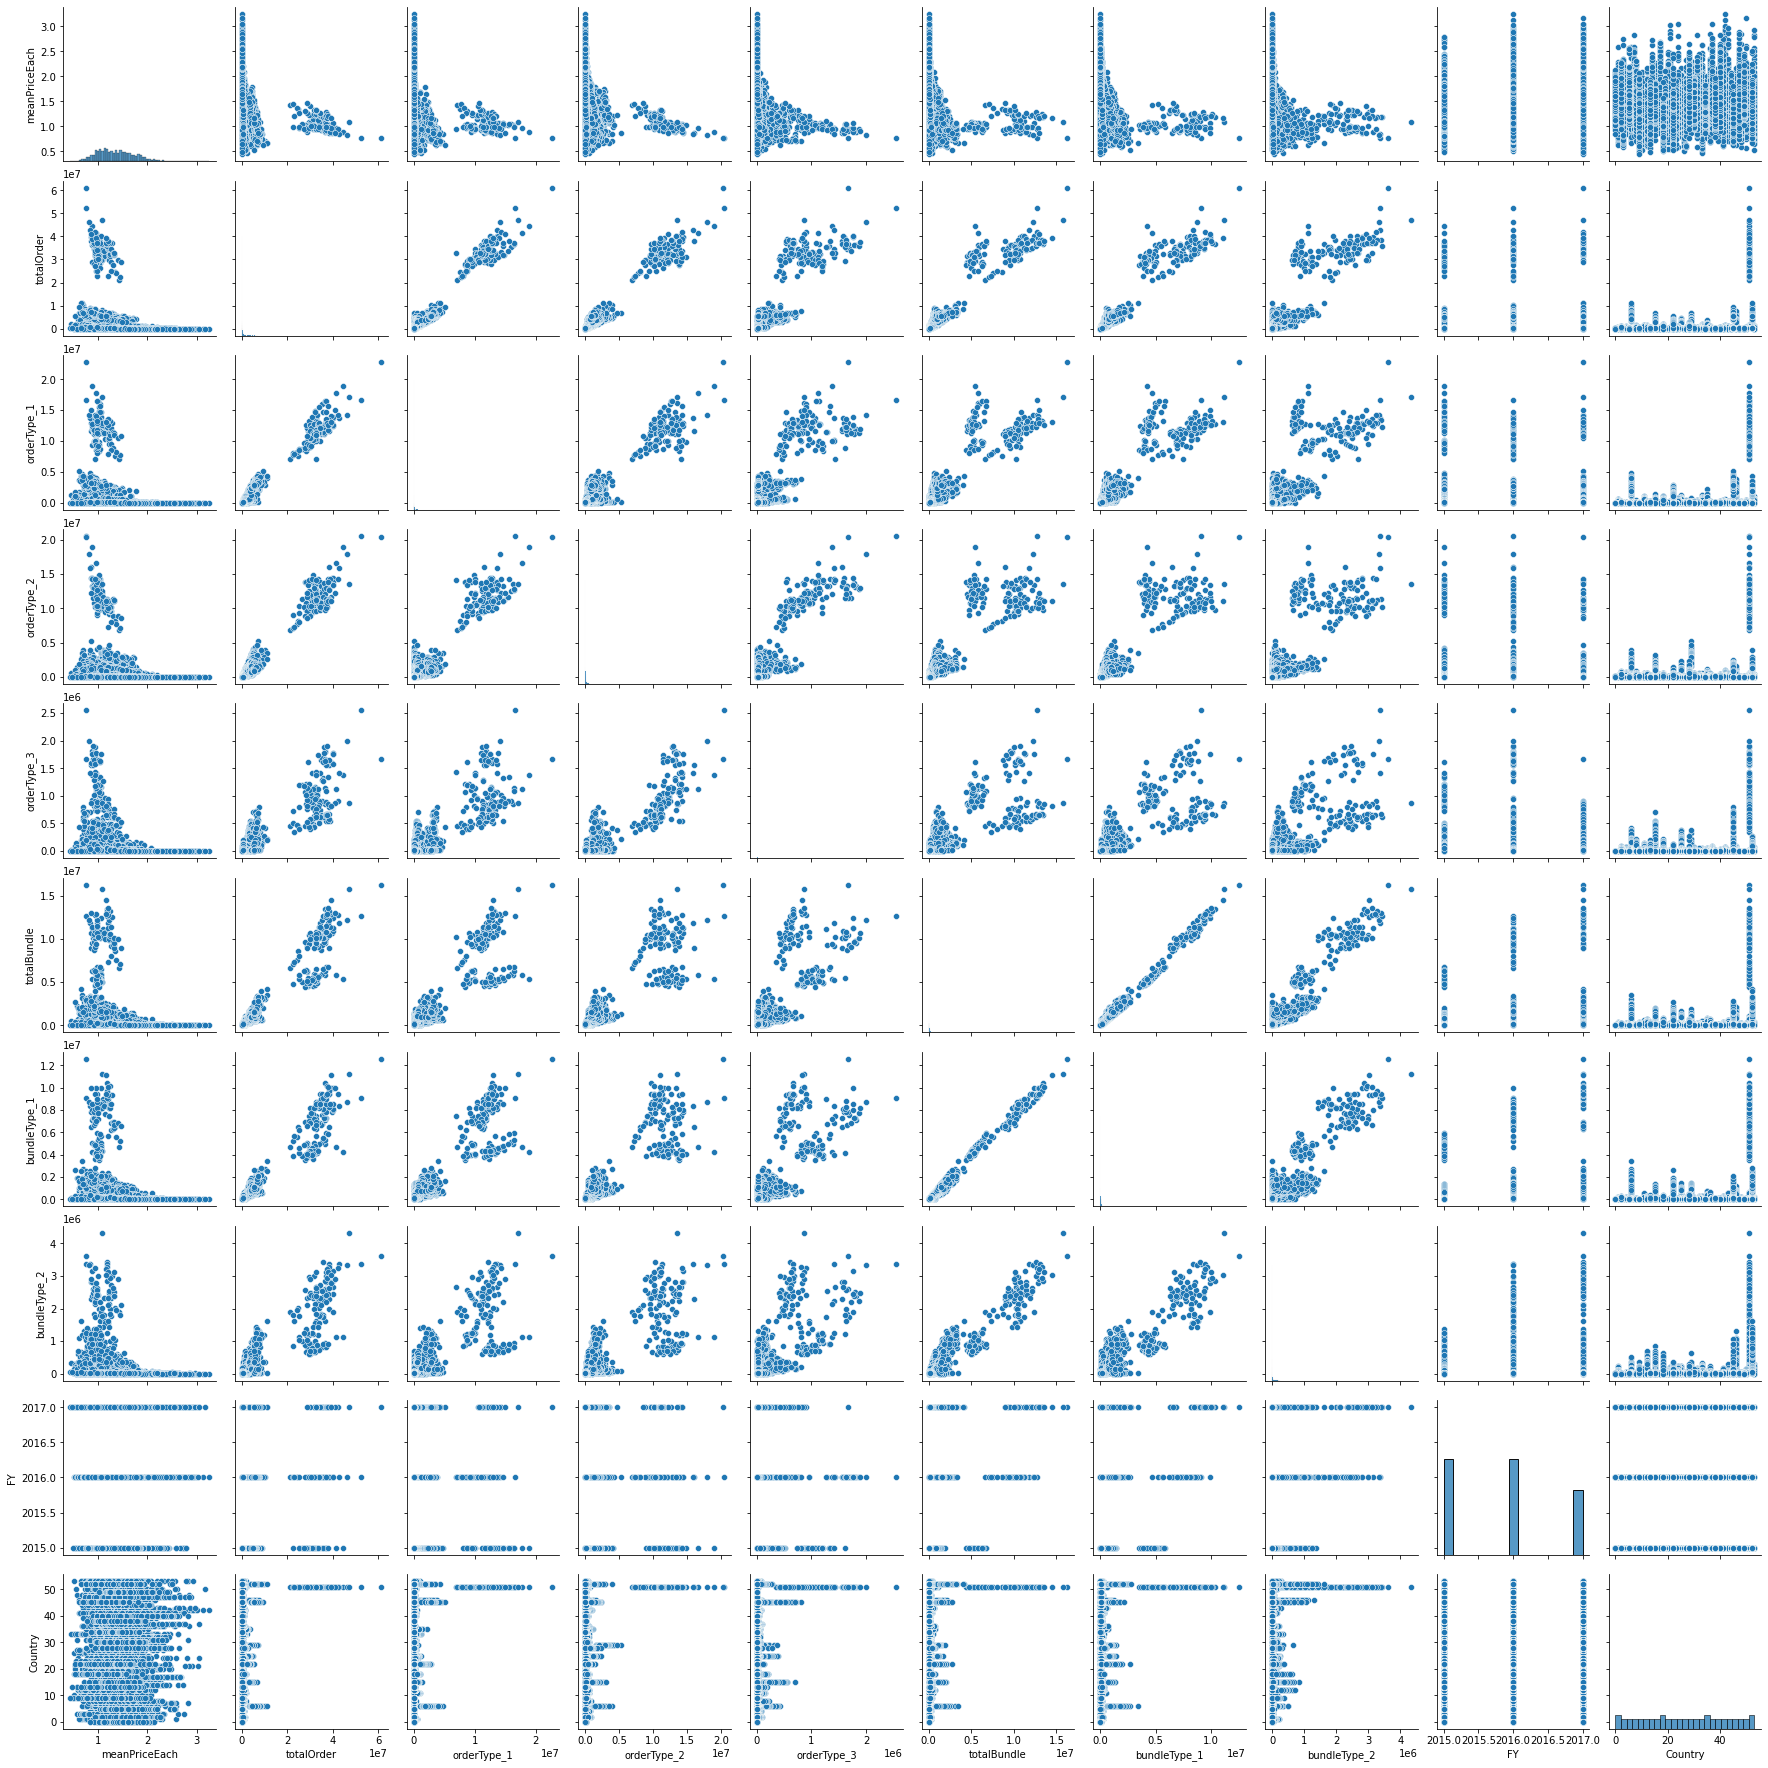

In [7]:
sns.pairplot(df_pd)
plt.show()

# totalOrder, totalBundle만 남기자

In [65]:
df_pd = df_pd[['meanPriceEach' , 'totalOrder' , 'totalBundle' , 'customerType' , 'FY' , 'Country', 'orderType_3']]

In [11]:
df_pd.head()

,meanPriceEach,totalOrder,totalBundle,customerType,FY,Country
0,1.56,58065.35,19114.43,Online,2015,25
1,1.10,2578275.12,510468.50,Offline,2015,25
2,1.17,2335986.11,551745.27,Offline,2015,25
3,1.52,65483.08,17296.48,Online,2015,25
4,1.65,52559.10,12492.18,Online,2015,25


In [15]:
# customerType 인코딩

encoder = LabelEncoder()

df_pd['customerType'] = encoder.fit_transform(df_pd.customerType)

In [17]:
df_pd['customerType'].value_counts()

# online, offline 수는 비슷함을 확인
# online: 1 , offline: 0

0    7506
1    7503
Name: customerType, dtype: int64

In [19]:
df_pd.head()

,meanPriceEach,totalOrder,totalBundle,customerType,FY,Country
0,1.56,58065.35,19114.43,1,2015,25
1,1.10,2578275.12,510468.50,0,2015,25
2,1.17,2335986.11,551745.27,0,2015,25
3,1.52,65483.08,17296.48,1,2015,25
4,1.65,52559.10,12492.18,1,2015,25


In [20]:
df_pd['Country'].value_counts()
# 모두 278개씩

47    278
49    278
27    278
19    278
11    278
3     278
50    278
42    278
34    278
26    278
18    278
10    278
2     278
41    278
39    278
33    278
25    278
17    278
9     278
1     278
48    278
40    278
32    278
24    278
16    278
8     278
35    278
43    278
51    278
4     278
31    278
23    278
15    278
7     278
46    278
38    278
30    278
22    278
14    278
6     278
45    278
37    278
29    278
21    278
13    278
5     278
52    278
44    278
36    278
28    278
20    278
12    278
0     278
53    275
Name: Country, dtype: int64

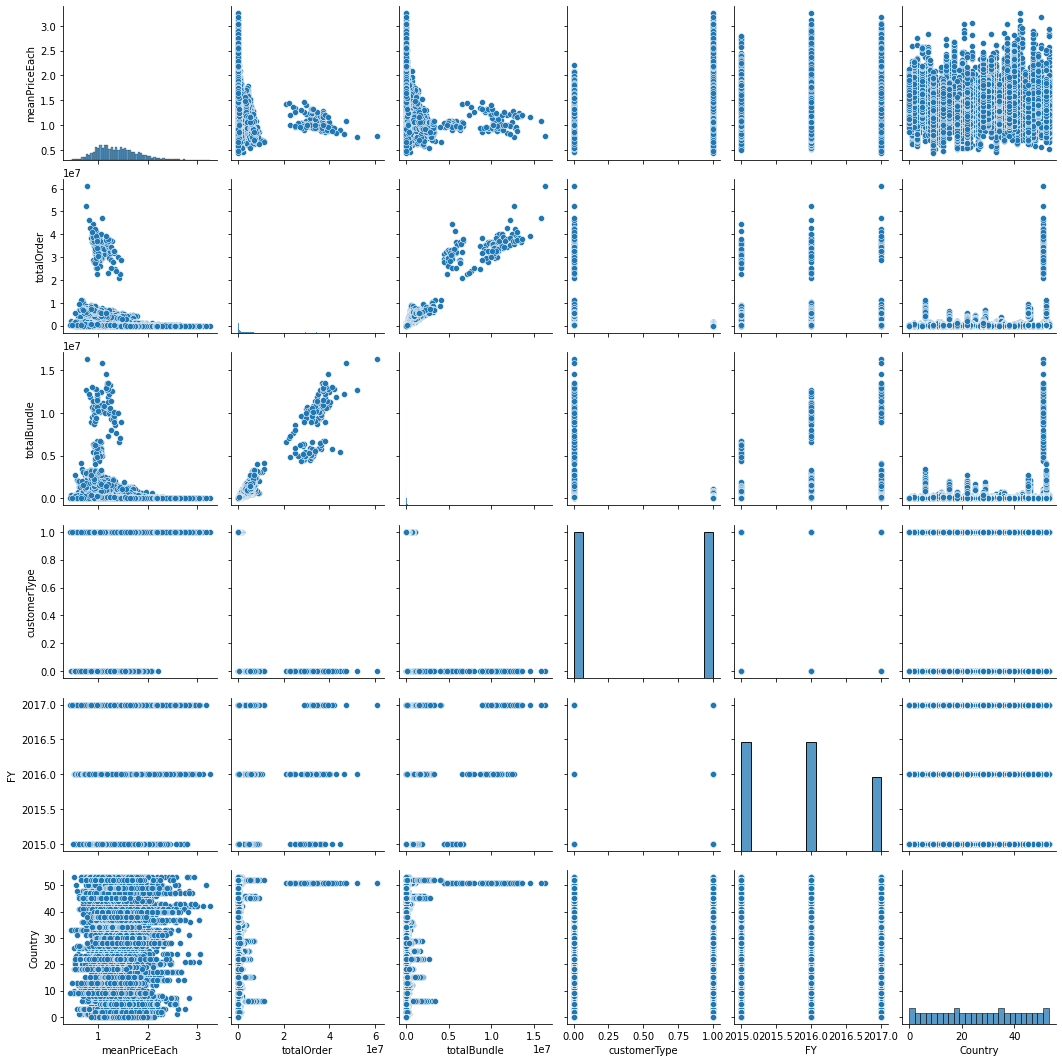

In [18]:
sns.pairplot(df_pd)

plt.show()


# total order, total bundle 이 offline이 현저히 높음


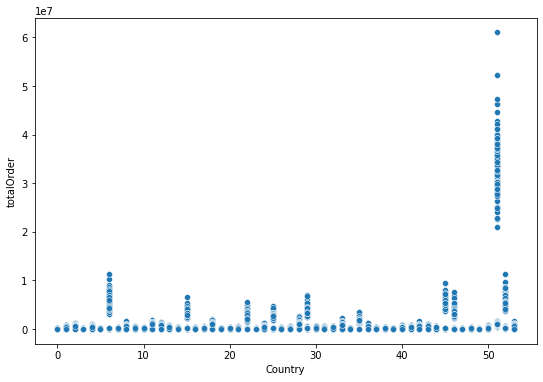

In [25]:
# country와 totalOrder, totalBundle의 상관관계

plt.figure(figsize=(9, 6))
sns.scatterplot(x = df_pd.Country, y = df_pd.totalOrder)
plt.show()


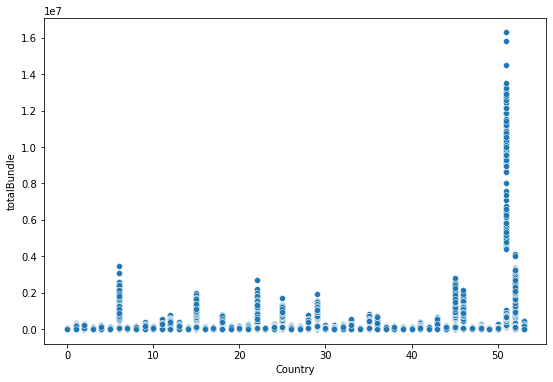

In [26]:
# country와 totalOrder, totalBundle의 상관관계

plt.figure(figsize=(9, 6))
sns.scatterplot(x = df_pd.Country, y = df_pd.totalBundle)
plt.show()


# country 51에 order가 매우 큼을 알 수 있다

In [27]:
df_pd[df_pd.Country == 51]

,meanPriceEach,totalOrder,totalBundle,customerType,FY,Country
1112,0.95,31324277.73,4498940.02,0,2015,51
1113,1.46,612910.15,158641.83,1,2015,51
1114,1.42,669528.88,133760.12,1,2015,51
1115,1.01,29063542.75,4517384.18,0,2015,51
1116,1.42,713120.00,142968.56,1,2015,51
...,...,...,...,...,...,...
1385,1.88,1014709.07,684998.04,1,2017,51
1386,1.41,29913744.37,9987521.96,0,2017,51
1387,1.96,1071538.25,698734.90,1,2017,51
1388,2.09,1045992.02,680088.21,1,2017,51


In [ ]:
# 분석방향
# 1) totalOrder, totalBundle 만 사용
# 2) totalOrder, totalBundle, Country 함께 사용(앞의 두 변수에 큰 영향을 끼치므로)

## 2. Train Test Split 7:3

### 1) totalOrder, totalBundle

In [32]:
X = df_pd[['totalOrder' , 'totalBundle']]
y = df_pd['customerType']


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data: ' , X_train.shape, y_train.shape)
print('Test Data: ' , X_test.shape, y_test.shape)

Train Data:  (10506, 2) (10506,)
Test Data:  (4503, 2) (4503,)


## 3. Logistic Regression

In [33]:
LR_1 = LogisticRegression()
LR_1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_hat_1 = LR_1.predict(X_test)

y_hat_1

array([0, 0, 0, ..., 0, 1, 1])

## 4. Metric: Accuracy, F1-Score

In [35]:
LR_1.score(X_train, y_train)

0.6658100133257187

In [36]:
LR_1.score(X_test, y_test)

0.654230512991339

In [38]:
f1_score(y_test, y_hat_1, pos_label = 0)

0.7383633002856662

In [39]:
f1_score(y_test, y_hat_1, pos_label = 1)
# 1일 때 f1 score가 많이 떨어짐

0.4903436988543371

### 2) totalOrder, totalBundle, Country

In [40]:
X = df_pd[['totalOrder' , 'totalBundle' , 'Country']]
y = df_pd['customerType']


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data: ' , X_train.shape, y_train.shape)
print('Test Data: ' , X_test.shape, y_test.shape)

Train Data:  (10506, 3) (10506,)
Test Data:  (4503, 3) (4503,)


In [41]:
LR_2 = LogisticRegression()
LR_2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_hat_2 = LR_2.predict(X_test)

y_hat_2

array([1, 0, 0, ..., 0, 1, 1])

In [43]:
# validation

LR_2.score(X_train, y_train)

0.894346087949743

In [44]:
LR_2.score(X_test, y_test)

# Country 정보를 넣었을 때 현저히 높아졌음을 볼 수 있다

0.8882966910948257

In [45]:
f1_score(y_test, y_hat_2, pos_label = 0)

0.8874468561199375

In [46]:
f1_score(y_test, y_hat_2, pos_label = 0)

0.8874468561199375

In [47]:
# 성능을 높일 수 있는 방향? country 51 더 살펴보자

In [48]:
df_51 = df_pd[df_pd.Country == 51]

df_51.head()

,meanPriceEach,totalOrder,totalBundle,customerType,FY,Country
1112,0.95,31324277.73,4498940.02,0,2015,51
1113,1.46,612910.15,158641.83,1,2015,51
1114,1.42,669528.88,133760.12,1,2015,51
1115,1.01,29063542.75,4517384.18,0,2015,51
1116,1.42,713120.00,142968.56,1,2015,51


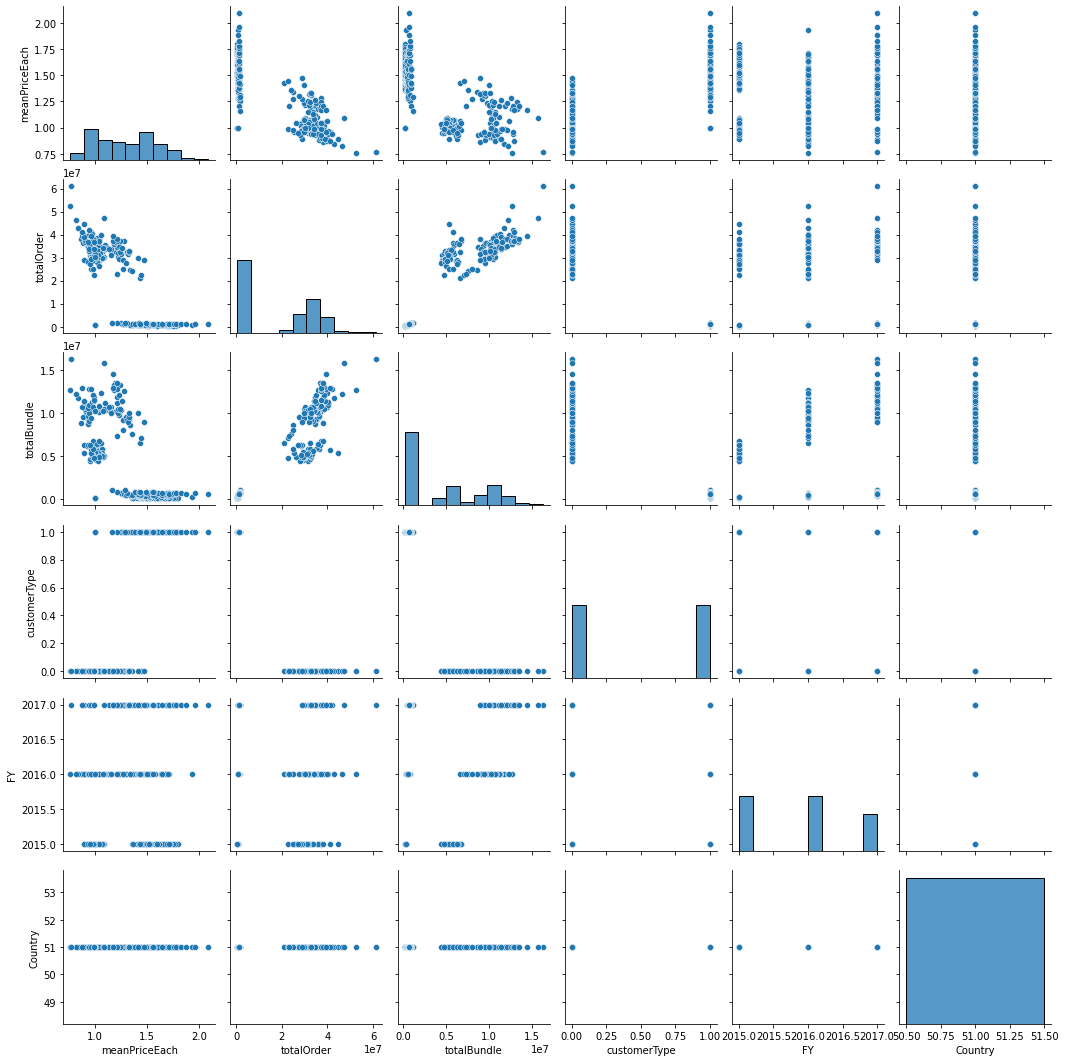

In [50]:
sns.pairplot(df_51)
plt.show()

# meanPrice도 좀 이상한데

In [52]:
# meanPrice 포함하여 모델 생성

X = df_pd[['totalOrder' , 'totalBundle' , 'Country' , 'meanPriceEach']]
y = df_pd['customerType']


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data: ' , X_train.shape, y_train.shape)
print('Test Data: ' , X_test.shape, y_test.shape)

Train Data:  (10506, 4) (10506,)
Test Data:  (4503, 4) (4503,)


In [53]:
LR_3 = LogisticRegression()
LR_3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_hat_3 = LR_3.predict(X_test)

y_hat_3

array([1, 0, 0, ..., 0, 1, 1])

In [55]:
LR_3.score(X_train, y_train)

0.8950123738815915

In [56]:
LR_3.score(X_test, y_test)

# 조금 더 높아졌음을 볼 수 있다

0.8896291361314679

In [57]:
f1_score(y_test, y_hat_2, pos_label = 0)

0.8874468561199375

In [58]:
f1_score(y_test, y_hat_2, pos_label = 1)

0.8891337888472559

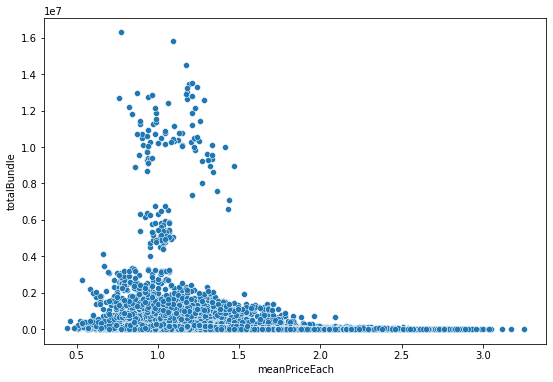

In [59]:
# meanPriceEach와 totalOrder, totalBundle의 상관관계

plt.figure(figsize=(9, 6))
sns.scatterplot(x = df_pd.meanPriceEach, y = df_pd.totalBundle)
plt.show()

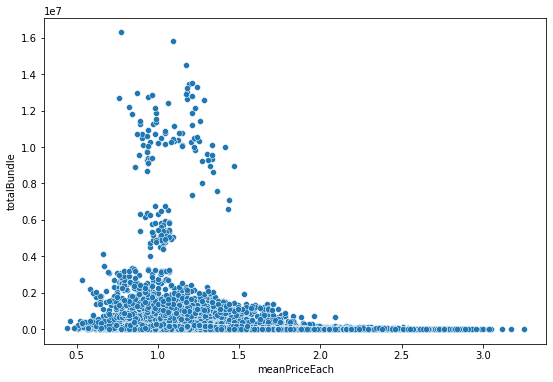

In [60]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x = df_pd.meanPriceEach, y = df_pd.totalBundle)
plt.show()

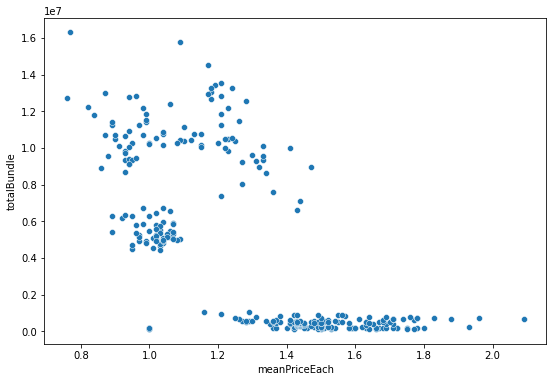

In [61]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x = df_51.meanPriceEach, y = df_51.totalBundle)
plt.show()

In [62]:
# ordertype_3 이 1, 2와 형태가 좀 다르고, meanPriceEach에 다른 영향을 주고 있음을 위에서 확인
# order, bundle은 어차피 비슷한 형태

# order, bundle, Country, meanprice, ordertype3 로 모델링 시도

In [66]:
X = df_pd[['totalOrder' , 'totalBundle' , 'Country' , 'meanPriceEach' , 'orderType_3']]
y = df_pd['customerType']


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data: ' , X_train.shape, y_train.shape)
print('Test Data: ' , X_test.shape, y_test.shape)

Train Data:  (10506, 5) (10506,)
Test Data:  (4503, 5) (4503,)


In [67]:
LR_4 = LogisticRegression()
LR_4.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
LR_4.score(X_train, y_train)

0.8946316390633924

In [69]:
LR_4.score(X_test, y_test)

# 성능이 더 낮아짐

0.8858538751943149

In [78]:
# totalOrder, Country, meanPriceEach로 모델링
X = df_pd[['totalOrder' , 'Country' , 'meanPriceEach' ]]
y = df_pd['customerType']


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data: ' , X_train.shape, y_train.shape)
print('Test Data: ' , X_test.shape, y_test.shape)

Train Data:  (10506, 3) (10506,)
Test Data:  (4503, 3) (4503,)


In [79]:
LR_5 = LogisticRegression()
LR_5.fit(X_train, y_train)

LR_5.score(X_train, y_train)

# 가장 높은 accuracy

0.8974871501998858

In [81]:
LR_5.score(X_test, y_test)

0.8971796580057739

In [82]:
y_hat_5 = LR_5.predict(X_test)

y_hat_5

array(['Online', 'Offline', 'Offline', ..., 'Offline', 'Online', 'Online'],
      dtype=object)

In [84]:
f1_score(y_test, y_hat_5, pos_label = 'Online')

0.9033201085821675

In [85]:
f1_score(y_test, y_hat_5, pos_label = 'Offline')

# online, offline 에서 모두 90 정도의 f1 score 보여줌

0.8902063078017549